In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imgw_api import get_hydro_metadata,get_meteo_metadata
from utils_maps import plot_zlewnia_stat

# Statystyka Przestrzenna

In [5]:
def get_map_wojewodztwa():
    return gpd.read_file("../static_data/wojewodztwa")

gdf_h = get_hydro_metadata(True)
gdf_m = get_meteo_metadata(True)
woj = get_map_wojewodztwa()
zlewnie = gpd.read_file('../static_data/zlewnie/zlewnie_2.gpkg')
zlewnie = zlewnie.rename(columns={"objectid" : "Zlewnia ID"})
zlewnie_stacje_h = gpd.sjoin(gdf_h, zlewnie, how='inner', predicate='within')

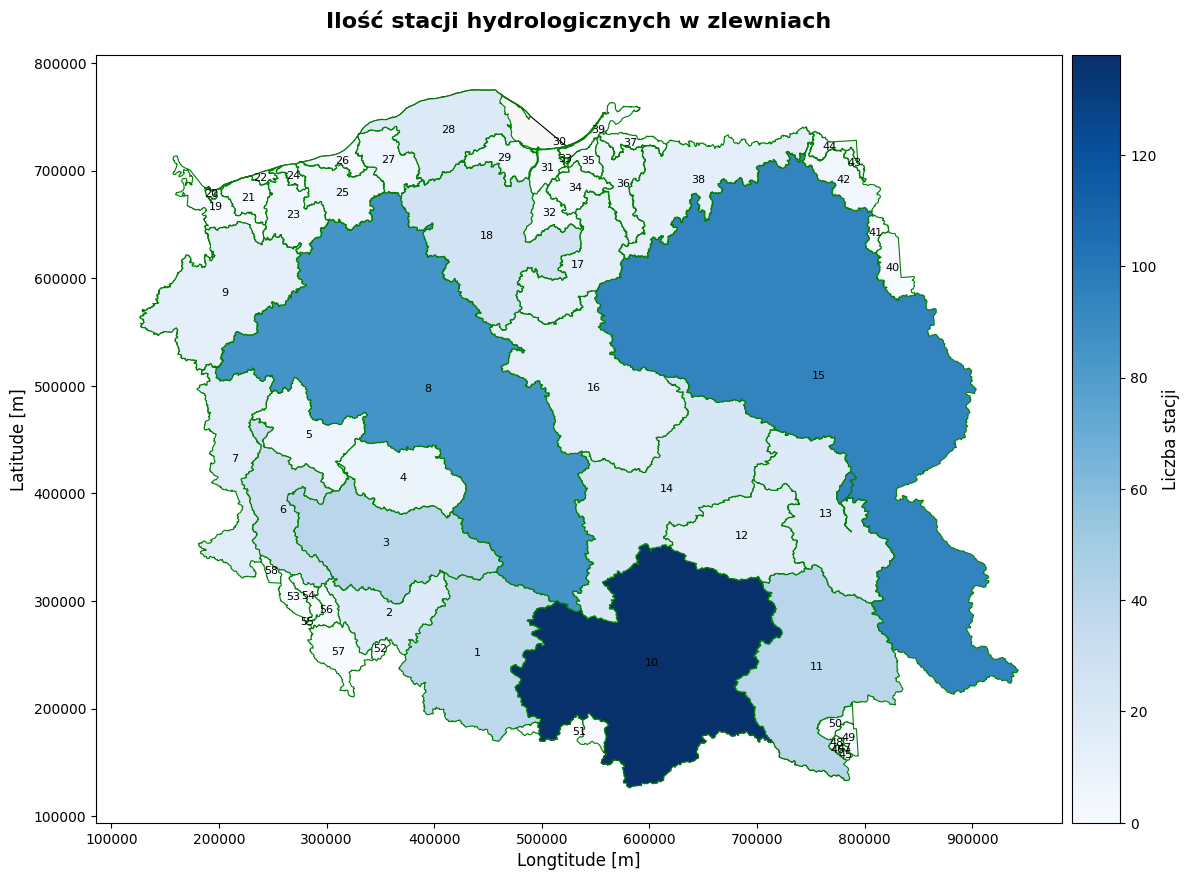

In [22]:
zlewnie['area_km2'] = zlewnie.geometry.area / 10**6  # m² → km²
count_df = zlewnie_stacje_h.groupby('Zlewnia ID').size().reset_index(name='Liczba stacji')
zlewnia_stats = zlewnie[['Zlewnia ID', 'area_km2']].merge(count_df, on='Zlewnia ID', how='left')
zlewnia_stats['Liczba stacji'] = zlewnia_stats['Liczba stacji'].fillna(0)
zlewnia_stats['Stacje na 100 km2'] = zlewnia_stats['Liczba stacji'] / zlewnia_stats['area_km2'] * 100

plot_zlewnia_stat(
    zlewnie_gdf=zlewnie,
    woj_gdf=woj,
    stats_df=zlewnia_stats,
    stat_column='Liczba stacji',
    title='Ilość stacji hydrologicznych w zlewniach',
    cmap='Blues',
    cbar_label='Liczba stacji'
)

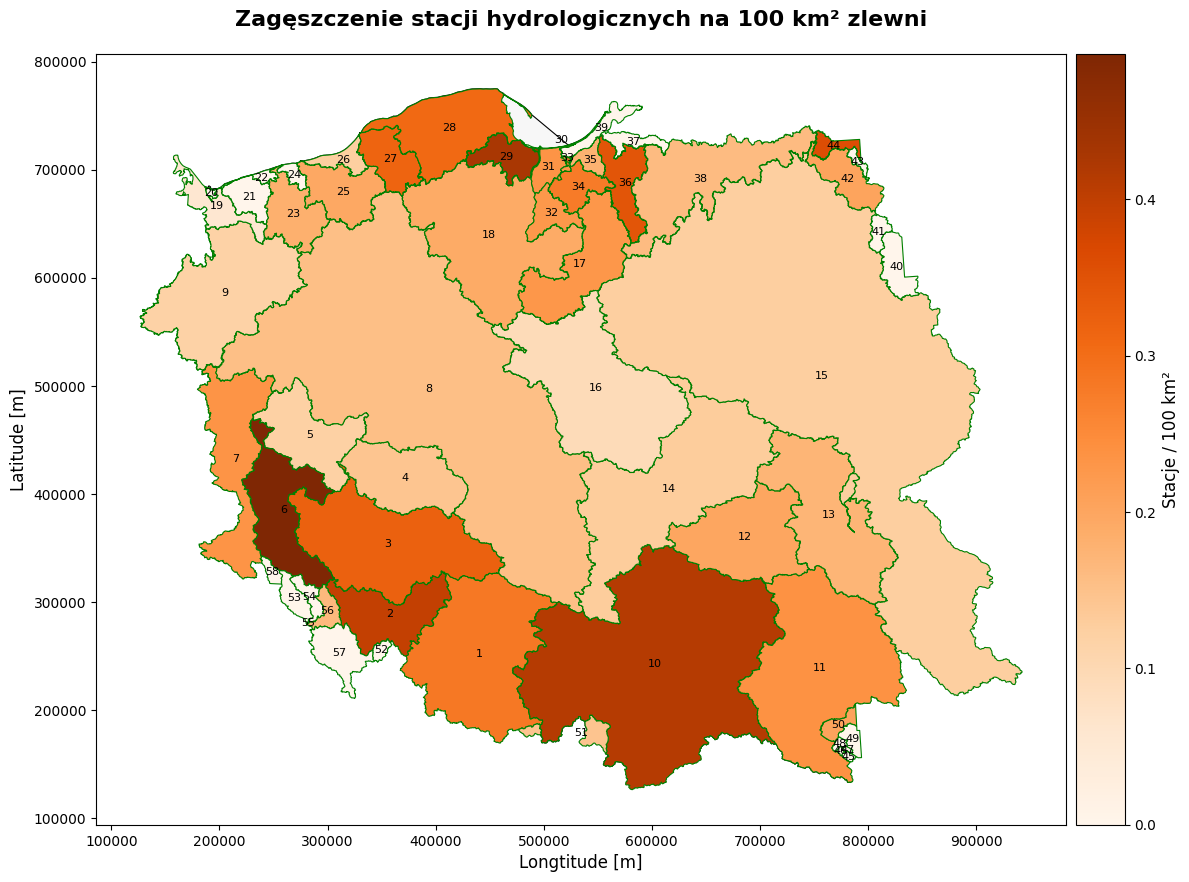

In [6]:
plot_zlewnia_stat(
    zlewnie_gdf=zlewnie,
    woj_gdf=woj,
    stats_df=zlewnia_stats,
    stat_column='Stacje na 100 km2',
    title='Zagęszczenie stacji hydrologicznych na 100 km² zlewni',
    cmap='Oranges',
    cbar_label='Stacje / 100 km²'
)

In [9]:
zlewnie_stacje_m = gpd.sjoin(gdf_m, zlewnie, how='inner', predicate='within')
count_df_m = zlewnie_stacje_m.groupby('Zlewnia ID').size().reset_index(name='Liczba stacji')
zlewnia_stats_m = zlewnie[['Zlewnia ID', 'area_km2']].merge(count_df_m, on='Zlewnia ID', how='left')
zlewnia_stats_m['Liczba stacji'] = zlewnia_stats_m['Liczba stacji'].fillna(0)
zlewnia_stats_m['Stacje na 100 km2'] = zlewnia_stats_m['Liczba stacji'] / zlewnia_stats_m['area_km2'] * 100


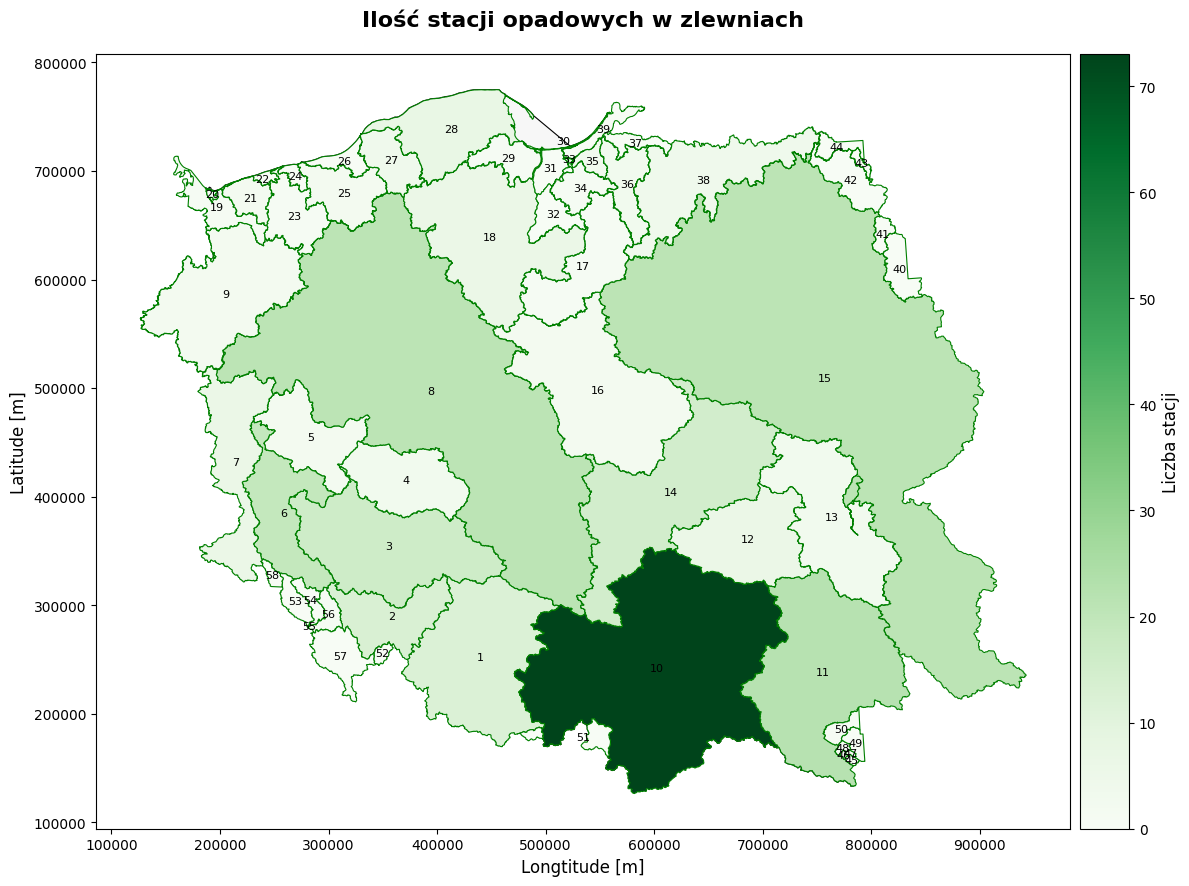

In [17]:
plot_zlewnia_stat(
    zlewnie_gdf=zlewnie,
    woj_gdf=woj,
    stats_df=zlewnia_stats_m,
    stat_column='Liczba stacji',
    title='Ilość stacji opadowych w zlewniach',
    cmap='Greens',
    cbar_label='Liczba stacji'
)

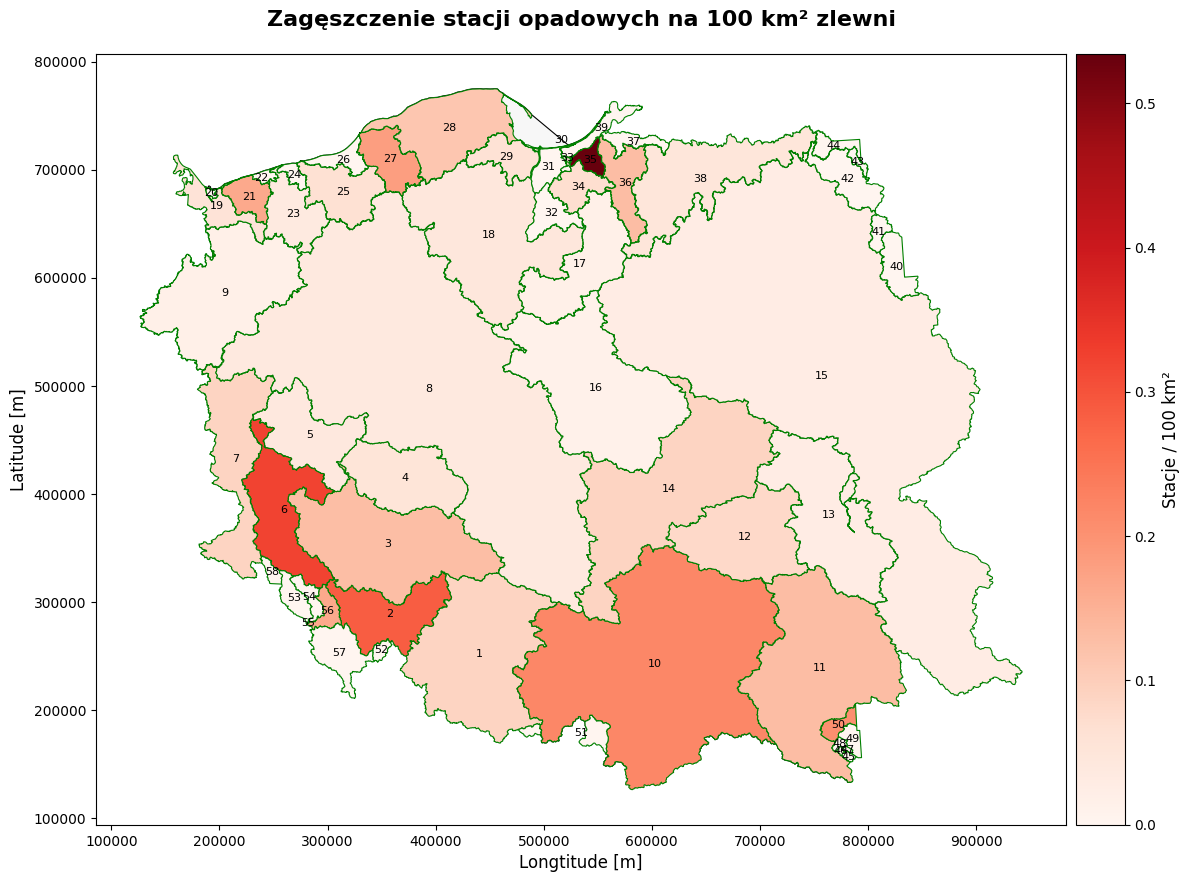

In [18]:
plot_zlewnia_stat(
    zlewnie_gdf=zlewnie,
    woj_gdf=woj,
    stats_df=zlewnia_stats_m,
    stat_column='Stacje na 100 km2',
    title='Zagęszczenie stacji opadowych na 100 km² zlewni',
    cmap='Reds',
    cbar_label='Stacje / 100 km²'
)